In [2]:
import os
import glob
import pandas as pd 
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from scipy import stats
import statsmodels as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
DIR=os.path.join("/NAS","tupac","protocoles","PULSE")

In [4]:
CLI_COMPLET=os.path.join(DIR,"Tableur","PULSE_COMPLET.xlsx")
GroupData_Full = pd.read_excel(CLI_COMPLET,index_col=0,engine='openpyxl')
GroupData_Full.index=GroupData_Full.index.astype(str)

In [22]:
GroupData.columns

NameError: name 'GroupData' is not defined

In [159]:
ax=plt.plot(GroupData['Conso_Eq_Caf_j'],GroupData['ECAS_Exe_F/48'],".")

KeyError: 'ECAS_Exe_F/48'

In [9]:
GroupData_Ima['Conso_Eq_Caf_j']

ID_Pulse
13002.0      66.500
13004.0     154.300
13005.0       0.714
13006.0     199.500
13007.0    1270.200
             ...   
nan             NaN
nan             NaN
nan             NaN
nan             NaN
nan             NaN
Name: Conso_Eq_Caf_j, Length: 1048575, dtype: float64

In [11]:
CLI_IMAGERIE=os.path.join(DIR,"Tableur","PULSE_IMAGERIE_142SUBJ.xlsx")
GroupData_Ima = pd.read_excel(CLI_IMAGERIE,index_col=0,engine='openpyxl',converters={'ID_Pulse':str})
GroupData_Ima.index=GroupData_Ima.index.astype(str)
np.median(GroupData_Ima['Conso_Eq_Caf_j'])

306.65700000000004

In [163]:
CLI_IMAGERIE=os.path.join(DIR,"Tableur","PULSE_SPIN_IMA.xlsx")
GroupData = pd.read_excel(CLI_IMAGERIE,index_col=0,engine='openpyxl',converters={'ID_Pulse':str})
GroupData.index=GroupData.index.astype(str)
np.median(GroupData['Conso_Eq_Caf_j'])

305.6

In [92]:
#GroupData=GroupData.drop('17006')
GroupData=GroupData.drop('1023')

(array([69., 53., 15.,  8.,  4.,  0.,  1.,  0.,  0.,  1.]),
 array([   0.    ,  294.5757,  589.1514,  883.7271, 1178.3028, 1472.8785,
        1767.4542, 2062.0299, 2356.6056, 2651.1813, 2945.757 ]),
 <BarContainer object of 10 artists>)

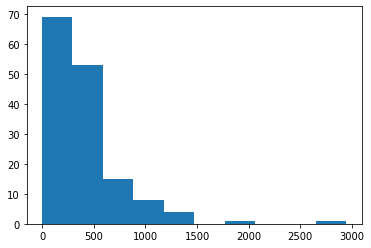

In [55]:
plt.hist(GroupData['Conso_Eq_Caf_j'])

(array([18.,  1.,  4.,  6.,  4.,  5., 10., 10.,  5.,  6., 14.,  6.,  6.,
         4.,  7.,  2.,  4.,  2.,  2.,  6.,  2.,  2.,  0.,  2.,  3.,  3.,
         2.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  3.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.     ,   29.45757,   58.91514,   88.37271,  117.83028,
         147.28785,  176.74542,  206.20299,  235.66056,  265.11813,
         294.5757 ,  324.03327,  353.49084,  382.94841,  412.40598,
         441.86355,  471.32112,  500.77869,  530.23626,  559.69383,
         589.1514 ,  618.60897,  648.06654,  677.52411,  706.98168,
         736.43925,  765.89682,  795.35439,  824.81196,  854.26953,
         883.7271 ,  913.1

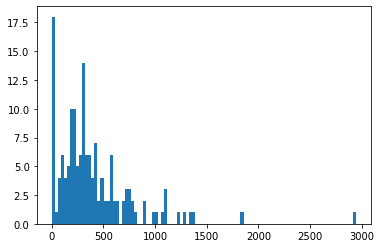

In [56]:
plt.hist(GroupData['Conso_Eq_Caf_j'],bins=100)

(array([[136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 91.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  34.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,   0.,

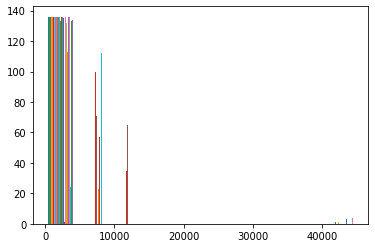

In [57]:
plt.hist(GroupData[GroupData['Conso_Eq_Caf_j']>10],bins=10)

In [74]:
CMD="fslstats "+ os.path.join(DIR,"Spin","spmT_0001.nii") + " -x"
VAL=os.system(CMD)

65 39 46 


In [96]:
#img=nib.load(os.path.join(DIR,"Spin_Caffeine","spmT_0001.nii"))
img=nib.load(os.path.join(DIR,"Spin_ALSFRs","spmT_0001.nii"))
values = img.get_fdata()
res=np.argmax(values)
print(np.unravel_index(res,values.shape))
print(values.flatten()[res])
print(values[np.unravel_index(res,values.shape)])

(65, 39, 46)
4.4301533699035645
4.4301533699035645


In [60]:
for ima in glob.iglob(os.path.join(DIR,"VBM","smwc1sub-*.nii")) :
    print(ima.replace(os.path.join(DIR,"VBM","smwc1sub-"),"")[:7])
    #img = nib.load(ima)
    #values = img.get_fdata()
    #print(values.flatten()[res])

03018MA
19002AP
04002MA
03049RC
01010DC
01006SC
03023PP
03001LC
19034LE
01018BV
19015BM
01023AM
19026OR
01007LA
03021TS
01012CC
01129VH
13006GD
01024GJ
01022SD
13013VC
16008ML
19031RP
03002MG
15001GC
13009MP
01020HP
01108MC
01067DP
01049DJ
01019VJ
01144GM
03037LN
03017PD
13003EG
17004LP
01017NB
04005PH
01016WR
03010BF
03008PM
03025PV
01070TP
03011MJ
01036TT
19003BJ
01035CJ
01008LB
03047BD
03034MJ
17002PH
03015RA
19029FJ
03031TM
03019JJ
19019FN
01043PM
03043DM
19006MB
16002DD
01042DD
17005MM
03036DR
19035SP
01038DM
01040LL
03013DC
01021EM
19013GJ
13010NS
01025FV
03041LI
15003FM
03022AB
19036CJ
13002BS
03055LE
19028HC
01123MJ
03044VG
19011GM
19007VN
16003FP
19021AF
01014FM
04011BS
03012CC
03006SF
15005OM
13007DP
03029PL
17003PB
13005CL
01109LJ
03004DB
19004MM
01054VL
01074PC
19001LD
01080PA
03024LV
19008BC
03045FP
19016MJ
04001RC
01066PG
03003MA
04004MM
19022SR
13014PM
13008BM
03039DA
01027KJ
01072HM
13004DF
04008GE
03035PR
03028HC
01030CB
19018GD
03009BC
19010BC
03014PH
13011GH
01160MA


In [97]:
NDG=[]
low_cons=[]
high_cons=[]
for CPT,SUBJ in enumerate(GroupData.index) :
    if (len(SUBJ) <5) :
        ima=glob.glob(os.path.join(DIR,"VBM","smwc1sub-0"+SUBJ+"*.nii"))
    else :
        ima=glob.glob(os.path.join(DIR,"VBM","smwc1sub-"+SUBJ+"*.nii"))
    img = nib.load(ima[0])
    values = img.get_fdata()
    NDG.append(values.flatten()[res])
    if (float(GroupData.loc[SUBJ]['Conso_Eq_Caf_j'])<Mediane):
        low_cons.append(values.flatten()[res])
    else :
        high_cons.append(values.flatten()[res])

new_col_df = pd.DataFrame(data=NDG,columns=['NDG'])
    #GroupData.insert(CPT,"NDG",values.flatten()[res])

In [68]:
GroupData.columns

Index(['Conso_Eq_Caf_j', 'GROUPE', 'Conso_Tabac', 'Conso_Alcool', 'Age', 'Sex',
       'BMI', 'Time_to_diagnosis_PS', 'ECAS_ SPE/100', 'ECAS_NONSPE/36',
       'ECAS_Total/136', 'Score_ALSFRS/48', 'VBM GM', 'VBM WM', 'VBM CSF',
       'Grey Matter Volume (mm3)', 'Average Thickness (mm)',
       'Grey Matter Volume (mm3).1', 'Average Thickness (mm).1',
       'Grey Matter Volume (mm3).2', 'Average Thickness (mm).2',
       'Grey Matter Volume (mm3).3', 'Average Thickness (mm).3',
       'Grey Matter Volume (mm3).4', 'Average Thickness (mm).4',
       'Grey Matter Volume (mm3).5', 'Average Thickness (mm).5',
       'Grey Matter Volume (mm3).6', 'Average Thickness (mm).6',
       'Grey Matter Volume (mm3).7', 'Average Thickness (mm).7',
       'Grey Matter Volume (mm3).8', 'Average Thickness (mm).8',
       'Grey Matter Volume (mm3).9', 'Average Thickness (mm).9',
       'Grey Matter Volume (mm3).10', 'Average Thickness (mm).10',
       'Grey Matter Volume (mm3).11', 'Average Thickness (m

In [13]:
GroupData.corr()

,Conso_Eq_Caf_j,GROUPE,Conso_Tabac,Conso_Alcool,Age,Sex,BMI,Time_to_diagnosis_PS,ECAS_ SPE/100,ECAS_NONSPE/36,...,Grey Matter Volume (mm3).21,Average Thickness (mm).21,Grey Matter Volume (mm3).22,Average Thickness (mm).22,Grey Matter Volume (mm3).23,Average Thickness (mm).23,Grey Matter Volume (mm3).24,Average Thickness (mm).24,Grey Matter Volume (mm3).25,Average Thickness (mm).25
Conso_Eq_Caf_j,1.000000,0.599034,0.161784,0.180796,-0.047338,-0.139356,0.033459,0.002098,0.011210,-0.056528,...,-0.002532,-0.010536,0.012394,-0.107265,0.015577,0.024871,-0.027124,-0.061988,0.034106,-0.032871
GROUPE,0.599034,1.000000,0.221678,0.223935,0.011669,-0.187803,0.040663,0.009207,0.110585,-0.029270,...,-0.066402,-0.113034,-0.097437,-0.157855,-0.205268,-0.071749,-0.046879,0.024155,-0.084694,-0.027893
Conso_Tabac,0.161784,0.221678,1.000000,0.127068,0.103380,-0.211611,0.028800,-0.059226,-0.101619,-0.032711,...,0.060442,-0.135743,0.002430,-0.111435,-0.014674,0.091912,0.017206,-0.070984,0.004400,-0.145281
Conso_Alcool,0.180796,0.223935,0.127068,1.000000,0.076645,-0.284870,0.013345,-0.081566,0.061010,0.025068,...,0.104416,-0.105966,0.021769,-0.052672,-0.074378,-0.013577,-0.030603,-0.015325,-0.026611,0.054834
Age,-0.047338,0.011669,0.103380,0.076645,1.000000,0.128258,0.001353,0.049321,-0.171838,-0.250860,...,-0.195507,-0.295380,-0.194101,-0.256959,-0.301826,0.117478,0.038628,-0.072671,-0.066782,0.036352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Average Thickness (mm).23,0.024871,-0.071749,0.091912,-0.013577,0.117478,-0.014564,0.062823,0.021675,-0.060439,-0.051144,...,-0.013639,-0.059505,0.034462,0.006201,0.116042,1.000000,0.088276,-0.020267,0.162619,-0.023481
Grey Matter Volume (mm3).24,-0.027124,-0.046879,0.017206,-0.030603,0.038628,-0.265654,0.050610,-0.056781,-0.099106,0.045052,...,0.511411,0.030169,0.698352,0.187872,0.569222,0.088276,1.000000,0.030537,0.797267,0.014904
Average Thickness (mm).24,-0.061988,0.024155,-0.070984,-0.015325,-0.072671,-0.112434,-0.032185,0.021837,0.099465,0.059550,...,0.145538,0.099713,0.119023,0.062671,0.158297,-0.020267,0.030537,1.000000,0.053395,-0.023483
Grey Matter Volume (mm3).25,0.034106,-0.084694,0.004400,-0.026611,-0.066782,-0.244279,-0.007563,-0.109877,-0.081361,-0.009233,...,0.523445,0.176468,0.695717,0.321755,0.718507,0.162619,0.797267,0.053395,1.000000,0.003055


In [67]:
from scipy import stats
stats.pearsonr(GroupData['Conso_Eq_Caf_j'], NDG)
#stats.ttest_1samp(GroupData['Conso_Eq_Caf_j'], NDG)

(0.3148797698843267, 8.690274324904761e-05)

Text(0.05, 0.95, '$y=0.000\\;x+0.432$\n$R^2 = 0.108$')

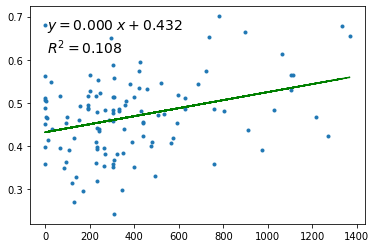

In [95]:
from sklearn.metrics import r2_score
ax=plt.plot(GroupData['Conso_Eq_Caf_j'],NDG,".")
z = np.polyfit(GroupData['Conso_Eq_Caf_j'],NDG, 1)
p = np.poly1d(z)
plt.plot(GroupData['Conso_Eq_Caf_j'],p(GroupData['Conso_Eq_Caf_j']),"g--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(NDG,p(GroupData['Conso_Eq_Caf_j'])):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,fontsize=14, verticalalignment='top')

Text(0.05, 0.95, '$y=0.005\\;x+0.227$\n$R^2 = 0.122$')

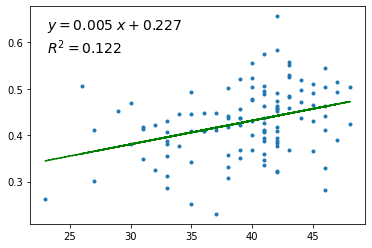

In [98]:
from sklearn.metrics import r2_score
ax=plt.plot(GroupData['Score_ALSFRS/48'],NDG,".")
z = np.polyfit(GroupData['Score_ALSFRS/48'],NDG, 1)
p = np.poly1d(z)
plt.plot(GroupData['Score_ALSFRS/48'],p(GroupData['Score_ALSFRS/48']),"g--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(NDG,p(GroupData['Score_ALSFRS/48'])):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,fontsize=14, verticalalignment='top')

In [139]:
GroupData.loc[SUBJ]['Conso_Eq_Caf_j']

2945.757

In [66]:
GroupData.iloc[np.argmax(NDG)]

Conso_Eq_Caf_j                 2945.757
GROUPE                            1.000
Conso_Tabac                       2.000
Conso_Alcool                      0.000
Age                              42.000
                                 ...   
Average Thickness (mm).23         2.644
Grey Matter Volume (mm3).24    3967.000
Average Thickness (mm).24         1.883
Grey Matter Volume (mm3).25    4865.000
Average Thickness (mm).25         2.089
Name: 1023, Length: 67, dtype: float64

In [126]:
new_df=GroupData.insert("NDG"=NDG)

SyntaxError: keyword can't be an expression (191912171.py, line 1)

<AxesSubplot:xlabel='GROUPE', ylabel='NDG'>

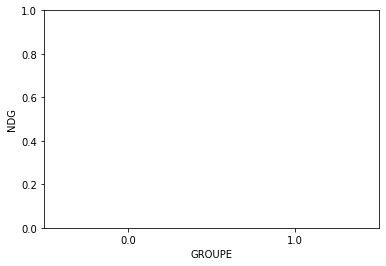

In [160]:
~/SVN/python/romain/HAMSI_test.ipynb

<AxesSubplot:xlabel='Sex', ylabel='Conso_Eq_Caf_j'>

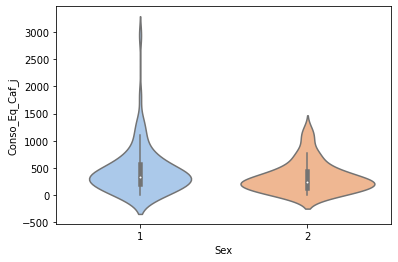

In [157]:
sns.violinplot(data=GroupData,y='Conso_Eq_Caf_j',x='Sex',palette="pastel")

<AxesSubplot:xlabel='Sex', ylabel='Conso_Alcool'>

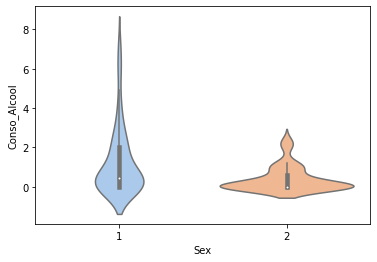

In [187]:
sns.violinplot(data=GroupData,y='Conso_Alcool',x='Sex',palette="pastel")

<AxesSubplot:xlabel='Conso_Eq_Caf_j', ylabel='Conso_Alcool'>

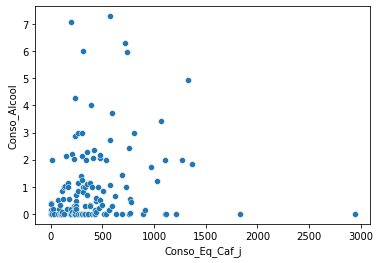

In [190]:
sns.scatterplot(x=GroupData['Conso_Eq_Caf_j'],y=GroupData['Conso_Alcool'])

# Extraction des valeurs moyennes d'épaisseur corticale dans chaque ROI de Glasser

Utilisation de la fonction Analysis_GlasserROI (dans runbatch.sh) avant

In [165]:
for FILE in ['CT.*.R.pscalar.nii']:
	dtFiles = sorted(gb.glob(join(DIR,"results","ROIGlasser","KFE_CT",FILE)))
	print(len(dtFiles))
	file=nb.load(dtFiles[0])
	print(file.get_fdata()[0])
	res=np.zeros(shape=(file.shape[1],len(dtFiles)))
	for cpt,ima in enumerate(dtFiles):
		print(ima)
		file=nb.load(ima)
		#img_data=[x.data for x in file.darrays]
		res[:,cpt]=file.get_fdata()[0]
#np.savetxt(join(DIR,'CT_R.csv'),res, delimiter=',')

142
[1.96716762 2.85693789 2.26109886 2.0922997  2.29838419 2.41651225
 2.84070492 2.44347882 1.82404351 2.55291414 2.49533129 2.52927923
 2.21467948 2.34469771 2.54690671 2.45801854 2.00553584 3.00710344
 2.33841443 2.25897431 2.63264155 2.76591802 2.67857504 2.55740952
 2.576092   2.84335899 2.6192131  2.71589327 2.97806501 2.94054723
 2.87981176 3.11265922 3.24016285 3.3063941  2.89348269 2.60915995
 2.38525534 2.50234485 2.33871675 2.76759124 3.04566503 2.30080366
 2.96637058 2.7458427  2.18642879 2.30902171 2.47136045 2.11020446
 2.64889264 2.22522235 2.40326858 2.19883561 1.98485374 2.73678327
 2.78861523 3.04846478 2.90683007 2.88064766 2.91662025 2.50179863
 3.06549335 2.79162264 3.07924271 2.93299174 2.35624361 2.41401315
 2.61947489 2.43681836 2.92391038 2.9843328  2.68974948 2.91618466
 2.49145865 2.836092   2.29927087 3.01697922 2.44482136 2.75151443
 2.25449395 2.292243   2.4346683  2.67843795 2.54541993 2.49794722
 2.33284783 2.28487277 2.70262146 2.60662913 2.26919198 2.

# Etude epaisseur corticale des bulbaires

In [223]:
df = pd.read_csv(os.path.join(DIR,'CT_bulbaire.csv'),sep=',',index_col=0,converters={'ID':str})

In [12]:
df=GroupData_Ima

In [13]:
df.corr()

,Conso_Eq_Caf_j,GROUPE,Conso_Tabac,Conso_Alcool,Age,Sex,BMI,Time_to_diagnosis_PS,ECAS_ SPE/100,ECAS_NONSPE/36,...,Grey Matter Volume (mm3).21,Average Thickness (mm).21,Grey Matter Volume (mm3).22,Average Thickness (mm).22,Grey Matter Volume (mm3).23,Average Thickness (mm).23,Grey Matter Volume (mm3).24,Average Thickness (mm).24,Grey Matter Volume (mm3).25,Average Thickness (mm).25
Conso_Eq_Caf_j,1.000000,0.599315,0.146555,0.194001,-0.090829,-0.128438,0.023320,0.006124,0.001782,-0.049892,...,0.014188,0.036248,0.048219,-0.033146,0.060752,0.025560,-0.006623,-0.066936,0.075869,-0.036086
GROUPE,0.599315,1.000000,0.230954,0.211950,-0.013747,-0.174666,0.016313,-0.005159,0.109151,-0.029730,...,-0.065833,-0.118662,-0.098781,-0.141402,-0.198610,-0.079213,-0.052440,0.020334,-0.074787,-0.034450
Conso_Tabac,0.146555,0.230954,1.000000,0.142908,0.103865,-0.190728,0.039878,-0.041827,-0.026214,-0.026057,...,0.037677,-0.111759,0.011594,-0.104802,0.002507,0.102900,0.025094,-0.068561,0.035417,-0.145821
Conso_Alcool,0.194001,0.211950,0.142908,1.000000,0.087861,-0.295508,-0.001354,-0.098366,0.074924,0.031244,...,0.103989,-0.133587,0.012385,-0.069589,-0.087314,-0.017311,-0.038846,-0.019079,-0.036015,0.051312
Age,-0.090829,-0.013747,0.103865,0.087861,1.000000,0.125457,0.031729,0.064664,-0.246510,-0.257534,...,-0.150771,-0.267281,-0.177523,-0.222221,-0.286708,0.122734,0.068376,-0.074829,-0.034505,0.038559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Average Thickness (mm).23,0.025560,-0.079213,0.102900,-0.017311,0.122734,-0.015977,0.061523,0.017728,-0.072021,-0.052482,...,-0.017683,-0.068205,0.033105,0.003715,0.116628,1.000000,0.088148,-0.021580,0.163117,-0.025008
Grey Matter Volume (mm3).24,-0.006623,-0.052440,0.025094,-0.038846,0.068376,-0.249331,0.024242,-0.067082,-0.111582,0.034054,...,0.505704,-0.000801,0.693729,0.175851,0.565359,0.088148,1.000000,0.029475,0.804804,0.013346
Average Thickness (mm).24,-0.066936,0.020334,-0.068561,-0.019079,-0.074829,-0.116808,-0.035652,0.017893,0.100870,0.059528,...,0.152840,0.098614,0.120852,0.063929,0.160577,-0.021580,0.029475,1.000000,0.050184,-0.025009
Grey Matter Volume (mm3).25,0.075869,-0.074787,0.035417,-0.036015,-0.034505,-0.246749,-0.028798,-0.128875,-0.120364,-0.023130,...,0.505295,0.137861,0.692826,0.314899,0.703308,0.163117,0.804804,0.050184,1.000000,-0.002664


In [14]:
#GroupData_Ima.columns
GroupData_Ima['ECAS_Total/136']

ID_Pulse
13002    120
13004    110
13005    111
13006    121
13007    115
        ... 
4004     119
4005     122
4011     125
4017      74
13003     96
Name: ECAS_Total/136, Length: 142, dtype: int64

In [15]:
def unconfound(y, confound, group_data=False):
    """
    This will remove the influence "confound" has on "y".
    If the data is made up of two groups, the group label (indicating the group) must be the first column of
    'confound'. The group label will be considered when fitting the linear model, but will not be considered when
    calculating the residuals.
    Args:
        y: [samples, targets]
        confound: [samples, confounds]
        group_data: if the data is made up of two groups (e.g. for t-test) or is just
                    one group (e.g. for correlation analysis)
    Returns:
        y_correct: [samples, targets]
    """
    # Demeaning beforehand or using intercept=True has similar effect
    #y = demean(y)
    #confound = demean(confound)

    lr = LinearRegression(fit_intercept=True).fit(confound, y)  # lr.coef_: [targets, confounds]
    if group_data:
        y_predicted_by_confound = lr.coef_[:, 1:] @ confound[:, 1:].T
    else:
        y_predicted_by_confound = lr.coef_ @ confound.T  # [targets, samples]
    y_corrected = y.T - y_predicted_by_confound
    return y_corrected.T  # [samples, targets]

1 R_MST_ROI 0.826 0.238
31 R_23d_ROI 0.826 0.166
106 R_TA2_ROI 0.826 0.172
133 R_TE2a_ROI 0.826 0.181
175 R_STSva_ROI 0.826 0.173
17 L_FFC_ROI 0.826 0.204
32 L_v23ab_ROI 0.826 0.168
34 L_31pv_ROI 0.826 0.171
38 L_5L_ROI 0.826 -0.176
54 L_6mp_ROI 0.826 -0.167
57 L_33pr_ROI 0.826 0.179
73 L_44_ROI 0.826 -0.192
114 L_FOP2_ROI 0.826 0.168
154 L_PHA2_ROI 0.826 0.209
162 L_VVC_ROI 0.826 0.195
175 L_STSva_ROI 0.826 0.171


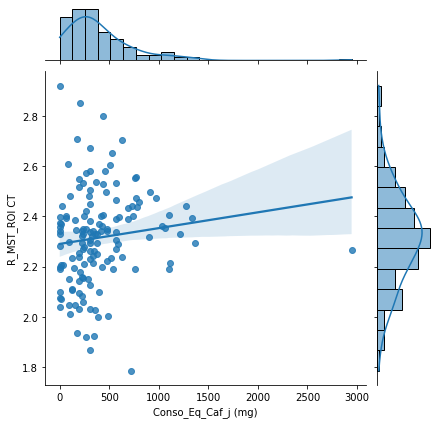

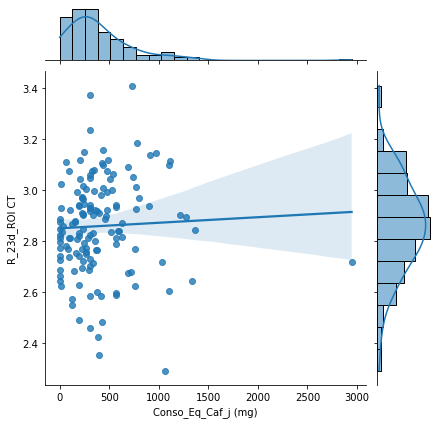

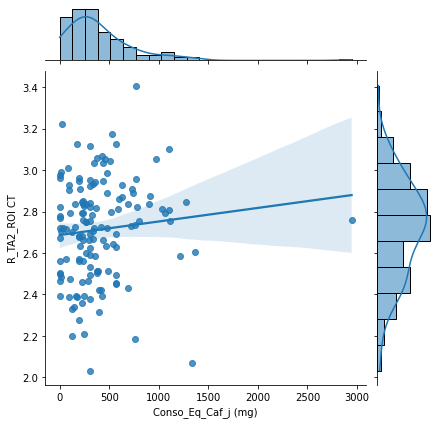

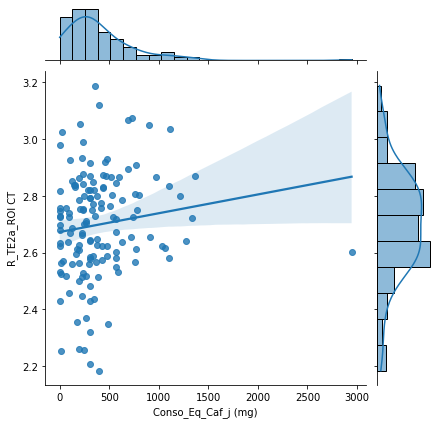

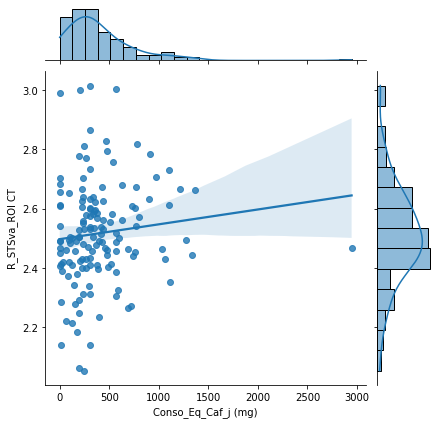

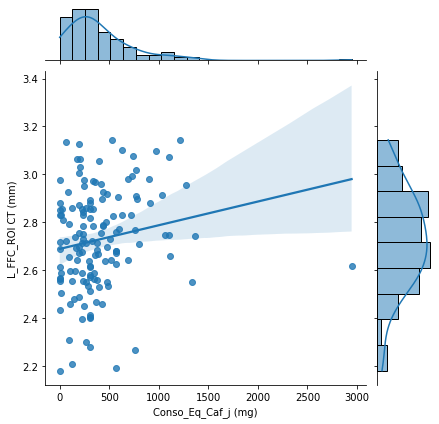

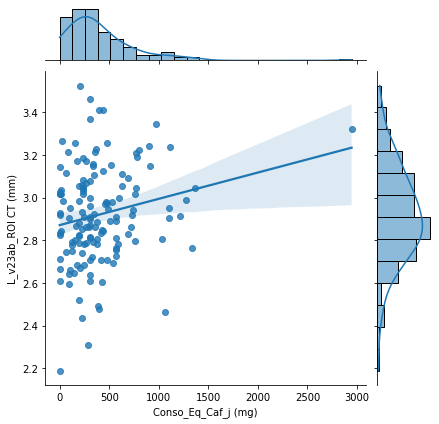

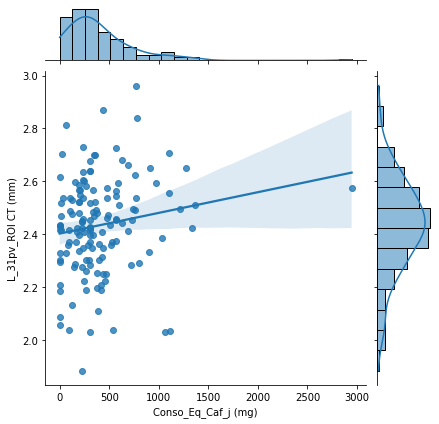

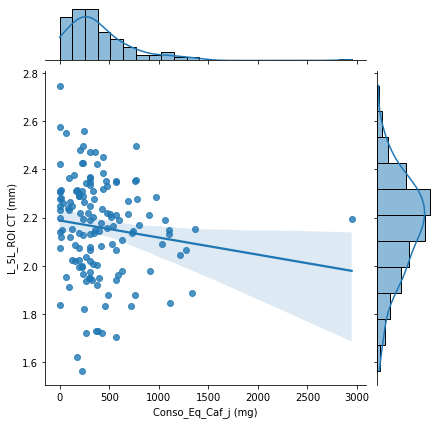

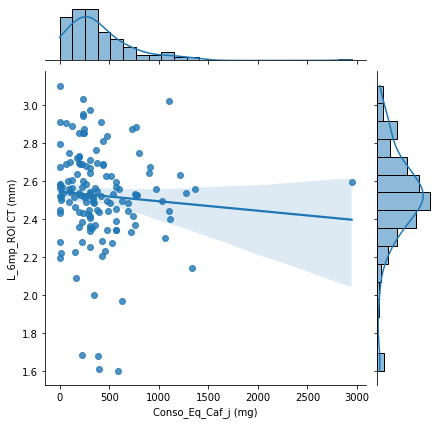

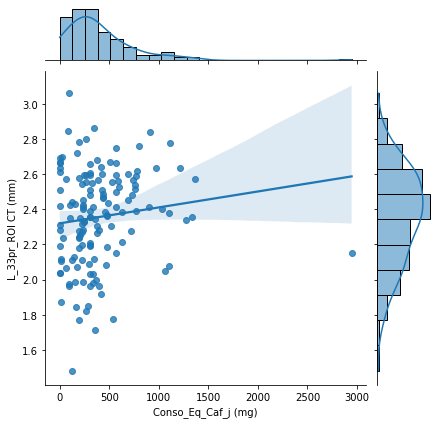

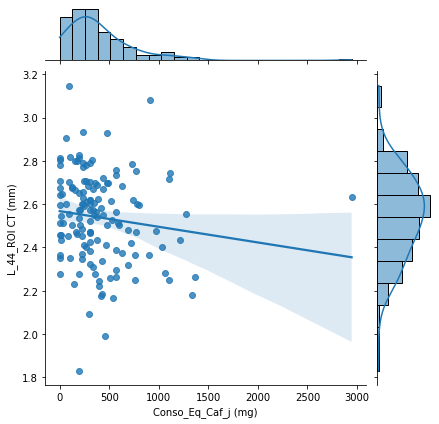

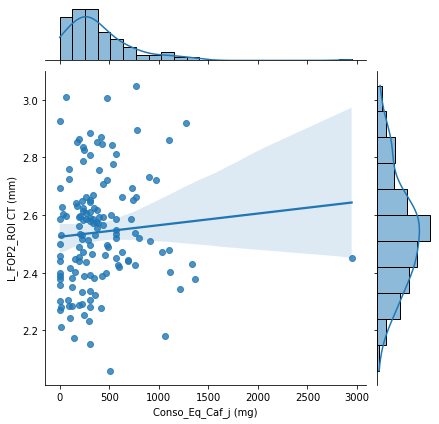

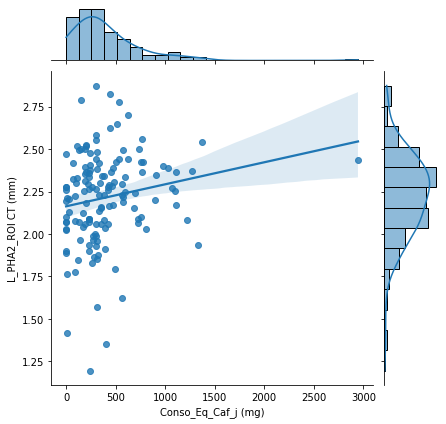

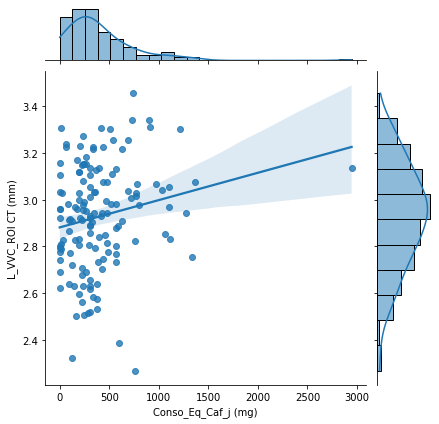

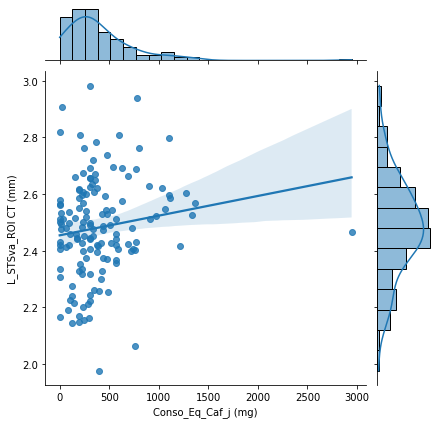

In [29]:
STUD_VAR='TOTAL_CAFEINE'
STUD_VAR='Conso_Eq_Caf_j'
#A DROITE
res_CT_R=np.zeros(shape=(len(df.index),180))#len(file.get_fdata()[0])))
res_CT_R_un=np.zeros(shape=(len(df.index),180))#,len(file.get_fdata()[0])))
for cpt,SUBJ in enumerate(df.index):
    if (len(str(SUBJ))<5):
        FILE=os.path.join(DIR,"results","ROIGlasser","KFE_CT",'CT.0'+str(SUBJ)+'.R.pscalar.nii')
    else :
        FILE=os.path.join(DIR,"results","ROIGlasser","KFE_CT",'CT.'+str(SUBJ)+'.R.pscalar.nii')
    file=nib.load(FILE)
    res_CT_R[cpt,:]=file.get_fdata()[0]
    
p_vals_R=[]
corr_R=[]
for col2 in range(0,res_CT_R.shape[1]):         
    #lr = LinearRegression(fit_intercept=True).fit(df['ECAS_Total'].values.reshape(-1, 1),res_CT_R[:,col2].reshape(-1, 1))  # lr.coef_: [targets, confounds]
    lr = LinearRegression(fit_intercept=True).fit(df['ECAS_Total/136'].values.reshape(-1, 1),res_CT_R[:,col2].reshape(-1, 1))  # lr.coef_: [targets, confounds]
    y_predicted_by_confound = lr.coef_ @ res_CT_R[:,col2].reshape(-1, 1).T  # [targets, samples]
    y_corrected = res_CT_R[:,col2].reshape(-1, 1).T - y_predicted_by_confound
    #res_CT_R_un[:,col2]=y_corrected.T.reshape(27,)
    res_CT_R_un[:,col2]=y_corrected.T.reshape(142,)
    res_stat=stats.spearmanr(df[STUD_VAR],res_CT_R[:,col2])
    p_vals_R.append(res_stat.pvalue)
    corr_R.append(res_stat.correlation)

#A GAUCHE    
res_CT_L=np.zeros(shape=(len(df.index),len(file.get_fdata()[0])))
res_CT_L_un=np.zeros(shape=(len(df.index),len(file.get_fdata()[0])))
for cpt,SUBJ in enumerate(df.index):
    if (len(str(SUBJ))<5):
        FILE=os.path.join(DIR,"results","ROIGlasser","KFE_CT",'CT.0'+str(SUBJ)+'.L.pscalar.nii')
    else :
        FILE=os.path.join(DIR,"results","ROIGlasser","KFE_CT",'CT.'+str(SUBJ)+'.L.pscalar.nii')
    file=nib.load(FILE)
    res_CT_L[cpt,:]=file.get_fdata()[0]

    
p_vals_L=[]
corr_L=[]
for col2 in range(0,res_CT_L.shape[1]):  
    #lr = LinearRegression(fit_intercept=True).fit(df['ECAS_Total/'].values.reshape(-1, 1),res_CT_L[:,col2].reshape(-1, 1))  # lr.coef_: [targets, confounds]    
    lr = LinearRegression(fit_intercept=True).fit(df['ECAS_Total/136'].values.reshape(-1, 1),res_CT_L[:,col2].reshape(-1, 1))  # lr.coef_: [targets, confounds]
    y_predicted_by_confound = lr.coef_ @ res_CT_L[:,col2].reshape(-1, 1).T  # [targets, samples]
    y_corrected = res_CT_L[:,col2].reshape(-1, 1).T - y_predicted_by_confound
    #res_CT_L_un[:,col2]=y_corrected.T.reshape(27,)
    res_CT_L_un[:,col2]=y_corrected.T.reshape(142,)
    res_stat=stats.spearmanr(df[STUD_VAR],res_CT_L[:,col2])
    p_vals_L.append(res_stat.pvalue)
    corr_L.append(res_stat.correlation)    

p_vals=p_vals_R+p_vals_L
corr_tot=corr_R+corr_L

b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(p_vals,alpha=0.05,method='indep',is_sorted=False)  

file=nib.load('/NAS/tupac/protocoles/PULSE/CT_Bulbaire.R.pscalar.nii')
new_img = nib.Cifti2Image((ps_fdr[:180]*b_fdr[:180]).reshape(1,180), header=file.header,nifti_header=file.nifti_header)
#new_img = nib.Cifti2Image((-1*np.log(ps_fdr)*b_fdr).reshape(1,180), header=file.header,nifti_header=file.nifti_header)
new_img.to_filename('/NAS/tupac/protocoles/PULSE/CT_Bulbaire_'+STUD_VAR+'.R.pscalar.nii') 

for cpt,idx in enumerate(file.header.get_index_map(1).parcels):
    #if (b_fdr[cpt]):
    if (p_vals[cpt]<0.05):
        print(cpt,idx.name,np.round(ps_fdr[cpt],3),np.round(corr_tot[cpt],3))   
        #plt.clf  
        g = sns.jointplot(x=STUD_VAR, y=res_CT_R_un[:,cpt],data=df,kind="reg")
        g.set_axis_labels(ylabel=idx.name + " CT",xlabel=STUD_VAR + " (mg)")
        g.savefig('/NAS/tupac/protocoles/PULSE/CT_Ima_'+STUD_VAR+'_'+idx.name +'.R.jpeg')
        #sns.scatterplot(x=df[STUD_VAR],y=res_CT_R[:,cpt])
        

file=nib.load('/NAS/tupac/protocoles/PULSE/CT_Bulbaire.L.pscalar.nii')
new_img = nib.Cifti2Image((ps_fdr[180:]*b_fdr[180:]).reshape(1,180), header=file.header,nifti_header=file.nifti_header)
#new_img = nib.Cifti2Image((-1*np.log(ps_fdr)*b_fdr).reshape(1,180), header=file.header,nifti_header=file.nifti_header)
new_img.to_filename('/NAS/tupac/protocoles/PULSE/CT_Bulbaire_'+STUD_VAR+'.L.pscalar.nii')     

for cpt,idx in enumerate(file.header.get_index_map(1).parcels):
    #if (b_fdr[cpt+180]):
    if (p_vals[cpt+180]<0.05):
        print(cpt,idx.name,np.round(ps_fdr[cpt+180],3),np.round(corr_tot[cpt+180],3)) 
        g = sns.jointplot(x=STUD_VAR, y=res_CT_L_un[:,cpt],data=df,kind="reg")
        g.set_axis_labels(ylabel=idx.name + " CT (mm)",xlabel=STUD_VAR + " (mg)")
        g.savefig('/NAS/tupac/protocoles/PULSE/CT_Ima_'+STUD_VAR+'_'+idx.name +'.R.jpeg')
        #plt.clf
        #sns.scatterplot(x=df[STUD_VAR],y=res_CT_L[:,cpt])        

In [28]:
print(p_vals,ps_fdr)

[0.19556845049044824, 0.0042709831965957, 0.4488042295760608, 0.7990320555258724, 0.26796985826249525, 0.07579940688385378, 0.13487504381911788, 0.7023841048334297, 0.3804160666628019, 0.5168864374273129, 0.8259612402405605, 0.6813874289580063, 0.9488010873668602, 0.11371289245805132, 0.702531108786858, 0.7786359664408345, 0.3366242766016668, 0.32385922489396735, 0.2949404702677031, 0.21765581693856464, 0.9052788184607228, 0.9705580863617503, 0.2843021539770665, 0.4037003063365926, 0.13699918186911547, 0.5383352690065947, 0.23778442123135807, 0.08400497933353382, 0.7769460349470898, 0.05149607459780476, 0.08667244128630985, 0.0487439609122802, 0.35813614562705975, 0.5663446436176172, 0.09832145995143808, 0.4944250552463515, 0.21257603541389927, 0.29904623191417756, 0.802304618849488, 0.7993763725511048, 0.9755719675428225, 0.7539643060702923, 0.48820603738321133, 0.3430049339460248, 0.4651776683891583, 0.38344727084597274, 0.8933063842987263, 0.9604156111200086, 0.18372138163885113, 0.

In [389]:
mycolumns = ['CONSO_TABAC','CONSO_ALCOOL','AGE', 'Sexe  ','ECAS_Total'] 
lr = LinearRegression(fit_intercept=True).fit(df[mycolumns].values.reshape(-1, 5),res_CT_L[:,col2].reshape(-1, 1))  # lr.coef_: [targets, confounds]
y_predicted_by_confound = lr.coef_ @ res_CT_L[:,col2].reshape(-1, 1).T  # [targets, samples]
y_corrected = res_CT_L[:,col2].reshape(-1, 1).T - y_predicted_by_confound

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 5)

In [390]:
lr.coef_


array([[ 0.00289595,  0.02061531, -0.00918761, -0.02348652, -0.00150623]])

In [375]:
print(res_CT_L[:,col2],y_corrected)

[3.17695093 2.54443169 3.09050822 2.46936059 2.78576684 2.92283297
 2.1849041  2.79069591 2.44732165 3.18026042 2.5143764  3.05171061
 3.0388968  2.64728379 2.75230956 2.956604   2.94505191 2.75393701
 2.92749    2.46495056 3.00426817 2.73171258 2.81888747 3.10383344
 2.92729402 3.06261849 2.88034248] [[3.17717751 2.54461316 3.09072864 2.46953671 2.78596552 2.92304142
  2.18505993 2.79089494 2.4474962  3.18048724 2.51455573 3.05192826
  3.03911354 2.6474726  2.75250586 2.95681487 2.94526195 2.75413342
  2.92769879 2.46512636 3.00448244 2.73190741 2.81908852 3.1040548
  2.92750279 3.06283692 2.88054791]]


In [167]:
CT_KF_ECAS_COMPLET=os.path.join(DIR,"ROI_Final.xlsx")
CT_KF_ECAS_Full = pd.read_excel(CT_KF_ECAS_COMPLET,index_col=0,engine='openpyxl')

In [168]:
CT_KF_ECAS_Full

,TOTAL_CAFEINE,CONSO_TABAC,CONSO_ALCOOL,AGE,Sexe,IMC,Disease_duration,Time_from_PS_to_inclusion,SITE_APP,ALS_PHENO,...,R_p47r,R_TGv,R_MBelt,R_LBelt,R_A4,R_STSva,R_TE1m,R_PI,R_a32pr,R_p24
ID_PULSE,,,,,,,,,,,,,,,,,,,,,
1006,203.00,0.0,0.07,55,1,23.040020,1.0,17.0,2,2.0,...,2.429527,3.744735,2.413087,2.735050,3.136663,3.002370,3.396205,2.753728,2.748163,3.011817
1008,202.26,0.0,2.20,53,2,27.390919,2.0,18.0,1,1.0,...,2.460224,3.216789,2.609130,2.258235,2.863474,2.426672,2.370296,2.716835,2.763495,3.074966
1010,308.29,0.0,6.00,60,1,26.234568,2.0,29.0,2,2.0,...,2.097214,3.244442,2.191843,2.441881,2.790206,2.577521,2.821562,2.448585,2.434445,2.987302
1012,152.00,10.0,2.14,42,1,21.952479,3.0,20.0,2,2.0,...,2.608769,3.210404,2.508752,2.538410,3.079708,2.281783,2.502995,2.538340,2.541281,2.990049
1013,735.79,0.0,5.95,63,1,23.388687,1.0,7.0,2,2.0,...,2.144121,3.073122,2.539361,2.554540,2.907874,2.443918,2.688787,2.517350,2.563570,2.886443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19034,1103.90,0.0,0.00,53,1,43.704475,10.0,4.0,2,2.0,...,2.087177,2.960950,2.477705,2.295888,2.821989,2.615484,3.016851,2.175180,2.304239,2.809217
19035,1368.00,40.0,1.86,59,1,28.042817,0.0,26.0,2,2.0,...,2.190116,3.443713,2.527312,2.417839,2.757270,2.664644,3.117543,2.574650,2.496447,2.821877
19036,240.00,0.0,0.71,73,2,25.493827,4.0,22.0,2,2.0,...,2.287237,3.864632,2.145658,2.148009,2.576690,2.814473,2.767147,2.328393,2.442777,3.275496


In [169]:
CT_KF_ECAS_Full.corr()

,TOTAL_CAFEINE,CONSO_TABAC,CONSO_ALCOOL,AGE,Sexe,IMC,Disease_duration,Time_from_PS_to_inclusion,SITE_APP,ALS_PHENO,...,R_p47r,R_TGv,R_MBelt,R_LBelt,R_A4,R_STSva,R_TE1m,R_PI,R_a32pr,R_p24
TOTAL_CAFEINE,1.000000,0.346500,0.188016,-0.080643,-0.115898,0.013299,-0.023916,0.054124,0.151388,0.049415,...,0.162220,0.007997,0.062470,0.011108,0.066617,0.105443,0.069034,0.029109,0.121018,0.045319
CONSO_TABAC,0.346500,1.000000,0.077580,-0.233170,-0.051946,-0.089214,-0.112177,0.024581,0.006971,-0.004009,...,0.174273,0.095758,0.081042,0.069615,0.044749,0.194856,0.097922,0.259253,0.108109,0.189699
CONSO_ALCOOL,0.188016,0.077580,1.000000,0.098626,-0.287040,-0.015631,0.007079,0.047122,0.181203,0.136266,...,0.059369,-0.023260,0.020433,0.046657,-0.006747,0.066743,0.004491,-0.013928,-0.056174,-0.062865
AGE,-0.080643,-0.233170,0.098626,1.000000,0.096413,0.037626,0.054738,0.090150,-0.102614,-0.166688,...,-0.302430,-0.062476,-0.195504,-0.086832,-0.243238,-0.244408,-0.258019,-0.369421,-0.150520,-0.124892
Sexe,-0.115898,-0.051946,-0.287040,0.096413,1.000000,-0.009871,-0.040131,-0.098427,-0.254075,-0.207054,...,-0.000053,0.073751,-0.036942,0.021314,0.129529,-0.183826,-0.040507,-0.157510,0.116700,0.203053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_STSva,0.105443,0.194856,0.066743,-0.244408,-0.183826,0.033294,-0.008589,-0.002858,0.057259,0.013844,...,0.243733,0.446553,0.258760,0.081920,0.197633,1.000000,0.510668,0.428195,0.065191,0.184559
R_TE1m,0.069034,0.097922,0.004491,-0.258019,-0.040507,0.041511,-0.044387,-0.101859,0.199655,0.194177,...,0.292878,0.290888,0.197646,0.264897,0.331818,0.510668,1.000000,0.166095,0.072014,0.167314
R_PI,0.029109,0.259253,-0.013928,-0.369421,-0.157510,0.002521,-0.091235,0.003361,-0.017156,-0.030418,...,0.279686,0.379563,0.478415,0.203253,0.270356,0.428195,0.166095,1.000000,0.278243,0.143515
R_a32pr,0.121018,0.108109,-0.056174,-0.150520,0.116700,0.041366,-0.111560,-0.063800,-0.065103,-0.029103,...,0.258589,0.102238,0.270551,0.293509,0.226141,0.065191,0.072014,0.278243,1.000000,0.364756


In [170]:
np.savetxt(join(DIR,'test_corr.csv'),CT_KF_ECAS_Full.corr(), delimiter=',')

In [171]:
GroupData_Full.index[GroupData_Full['Conso_Alcool'].isna()]
GroupData_Full=GroupData_Full.drop('3001')
GroupData_Full=GroupData_Full.drop('9018')

ID_PULSE
1006     0.07
1008     2.20
1010     6.00
1012     2.14
1013     5.95
         ... 
19034    0.00
19035    1.86
19036    0.71
19037    0.00
19038    0.00
Name: CONSO_ALCOOL, Length: 137, dtype: float64

In [278]:
GroupData_Full=GroupData_Full.drop('1023')

In [22]:
CT_KF_ECAS_Full

NameError: name 'CT_KF_ECAS_Full' is not defined

In [279]:
#stats.pearsonr(CT_KF_ECAS_Full['TOTAL_CAFEINE'],CT_KF_ECAS_Full['CONSO_ALCOOL'])
test=stats.spearmanr(GroupData_Full['Conso_Eq_Caf_j'],GroupData_Full['Conso_Alcool'])

In [276]:
for col in range(45,403):    
    res=stats.spearmanr(CT_KF_ECAS_Full['TOTAL_CAFEINE'],CT_KF_ECAS_Full.iloc[:,col])
    if res.pvalue < 0.01 :
        print(CT_KF_ECAS_Full.columns[col],res.correlation, res.pvalue)

L_33pr 0.2215578862961961 0.009270139123003538
R_MST 0.22190794668302558 0.009156788004827374


In [296]:
for col in [col for col in CT_KF_ECAS_Full if col.startswith('ECAS')]:    
    for col2 in range(45,403):           
        res=stats.spearmanr(CT_KF_ECAS_Full[col],CT_KF_ECAS_Full.iloc[:,col2])
        if res.pvalue < 0.001 :
            print(col,CT_KF_ECAS_Full.columns[col2],res.correlation, res.pvalue)

ECAS_Lang R_7PC 0.28634283039113767 0.0006934279468903657
ECAS_Lang R_MIP 0.2911371122370043 0.0005574195212000935
ECAS_Lang_cutOFF R_7PC -0.2898437731250466 0.0005914588605502992
ECAS_Mem L_TGd 0.2986870795522172 0.0003921752094368898
ECAS_Mem R_RI 0.30889013726859854 0.00024012491409969587
ECAS_Vis R_OP2-3 0.280231787841467 0.0009109105700637508
ECAS_SPE L_PSL 0.31728094373495297 0.0001582593700050377
ECAS_SPE L_LIPv 0.29716434768677125 0.00042132169859867603
ECAS_SPE L_d32 0.30456933001650616 0.0002962126095942497
ECAS_SPE L_47l 0.2846864033381488 0.0007470978560642406
ECAS_SPE L_TE1p 0.32178608918516716 0.00012587215856001634
ECAS_SPE L_TF 0.2967414061273891 0.00042976500639530234
ECAS_SPE R_V3B 0.29155394611728763 0.0005468393923597617
ECAS_SPE R_STV 0.2910725872154494 0.0005590740522092155
ECAS_SPE R_7PL 0.2899790145646713 0.0005878119160576492
ECAS_SPE R_TA2 0.2978303053907707 0.00040833693041471156
ECAS_SPE R_A5 0.330588414346452 7.963185164083965e-05
ECAS_SPE R_TE1p 0.35309311

In [299]:
for col in [col for col in CT_KF_ECAS_Full if col.startswith('ECAS')]:    
    res=stats.spearmanr(CT_KF_ECAS_Full['TOTAL_CAFEINE'],CT_KF_ECAS_Full[col])
    if res.pvalue < 0.05 :
            print(col,res.correlation, res.pvalue)

SpearmanrResult(correlation=nan, pvalue=nan)


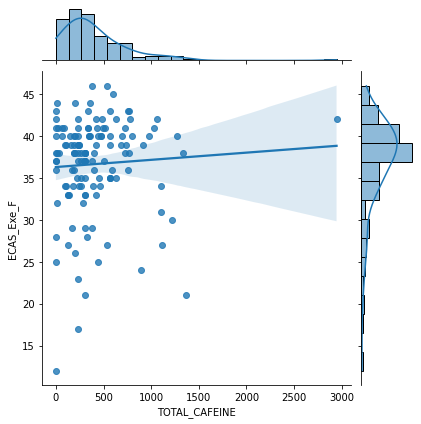

In [328]:
g = sns.jointplot(x="TOTAL_CAFEINE", y="ECAS_Exe_F",data=CT_KF_ECAS_Full,kind="reg")
print(stats.spearmanr(CT_KF_ECAS_Full['TOTAL_CAFEINE'],CT_KF_ECAS_Full["ECAS_Exe_F"]))

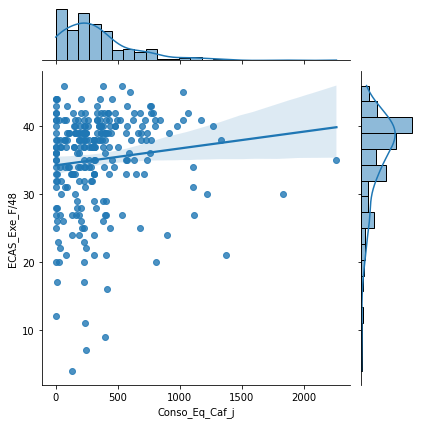

In [324]:
g = sns.jointplot(x="Conso_Eq_Caf_j", y="ECAS_Exe_F/48",data=tmp,kind="reg")
print(stats.spearmanr(tmp['Conso_Eq_Caf_j'],tmp["ECAS_Exe_F/48"]))

In [322]:
tmp=GroupData_Full
for subj in GroupData_Full.index[GroupData_Full['ECAS_Exe_F/48'].isna()] :
    tmp=tmp.drop(subj)

In [323]:
stats.spearmanr(tmp['Conso_Eq_Caf_j'],tmp["ECAS_Exe_F/48"])

SpearmanrResult(correlation=0.1983200853481409, pvalue=0.0011474640670271926)

In [319]:
tmp.columns

Index(['Conso_Cafe', 'Conso_Eq_Caf_j', 'Conso_Tabac', 'Conso_Cig',
       'Conso_Alcool', 'Age', 'Sex', 'BMI', 'Time_to_diagnosis_PS',
       'Disease_duration', 'Site _PS', 'ALS_phen', 'Deglutition', 'DFT',
       'ECAS_Lang/28', 'ECAS_Flu/24', 'ECAS_Exe_F/48', 'ECAS_Mem/24',
       'ECAS_Vis/12', 'ECAS_ SPE/100', 'ECAS_NONSPE/36', 'ECAS_Total/136',
       'Deces', 'Time_to_Death_diag', 'Score_ALSFRS/48'],
      dtype='object')

In [399]:
vect4GaitNPark=np.array([0.001,0.004,0.002,0.011,0.003,0.001,0.024,0.009,0.102,0.041,0.638,0.105,0.358,0.037,0.241,0.041,0.334,0.088,0.609,0.054,0.016,0.099,0.099,0.043,0.137,0.157,0.240,0.505,0.382,0.319,0.913,0.536,0.811])
b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(vect4GaitNPark,alpha=0.05,method='indep',is_sorted=False)
print(b_fdr,ps_fdr)

[ True  True  True False  True  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False] [0.0165     0.0264     0.022      0.05185714 0.02475    0.0165
 0.088      0.0495     0.18236842 0.10915385 0.67916129 0.18236842
 0.45438462 0.10915385 0.34578261 0.10915385 0.44088    0.18236842
 0.6699     0.12728571 0.066      0.18236842 0.18236842 0.10915385
 0.22605    0.24671429 0.34578261 0.59517857 0.46688889 0.438625
 0.913      0.60993103 0.83634375]


In [400]:
vect4GaitNPark<0.05

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False])

In [403]:
test=np.sort(vect4GaitNPark)
print(test)
b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(test,alpha=0.05,method='indep',is_sorted=False)
print(b_fdr,ps_fdr)

[0.001 0.001 0.002 0.003 0.004 0.009 0.011 0.016 0.024 0.037 0.041 0.041
 0.043 0.054 0.088 0.099 0.099 0.102 0.105 0.137 0.157 0.24  0.241 0.319
 0.334 0.358 0.382 0.505 0.536 0.609 0.638 0.811 0.913]
[ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False] [0.0165     0.0165     0.022      0.02475    0.0264     0.0495
 0.05185714 0.066      0.088      0.10915385 0.10915385 0.10915385
 0.10915385 0.12728571 0.18236842 0.18236842 0.18236842 0.18236842
 0.18236842 0.22605    0.24671429 0.34578261 0.34578261 0.438625
 0.44088    0.45438462 0.46688889 0.59517857 0.60993103 0.6699
 0.67916129 0.83634375 0.913     ]
